In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [6]:
print(f"tensorflow version {tf.__version__}")
print(f"tensorflow version {tf.keras.__version__}")

tensorflow version 2.12.0
tensorflow version 2.12.0


In [10]:
##check gpu and cpu
tf.config.list_physical_devices("GPU")


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

##creating simple classifier using keras mninst data set

In [13]:
mnist = tf.keras.datasets.mnist

In [14]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [15]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [20]:
x_train_full.shape,y_train_full.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

##scale the data between 0 to 1

In [26]:
x_valid,x_train = x_train_full[:10000]/255.,x_train_full[10000:]/255.
y_valid,y_train = y_train_full[:10000],y_train_full[10000:]
x_test = x_test/255.

In [29]:
y_valid.shape

(10000,)

In [30]:
y_train.shape

(50000,)

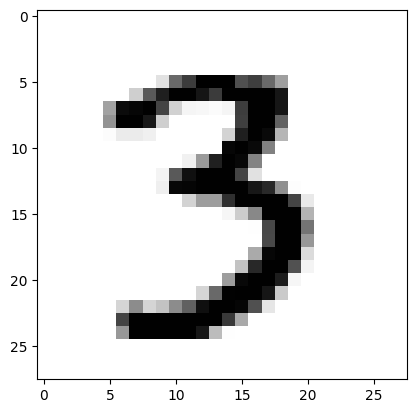

In [31]:
plt.imshow(x_train[0],cmap='binary')

<Axes: >

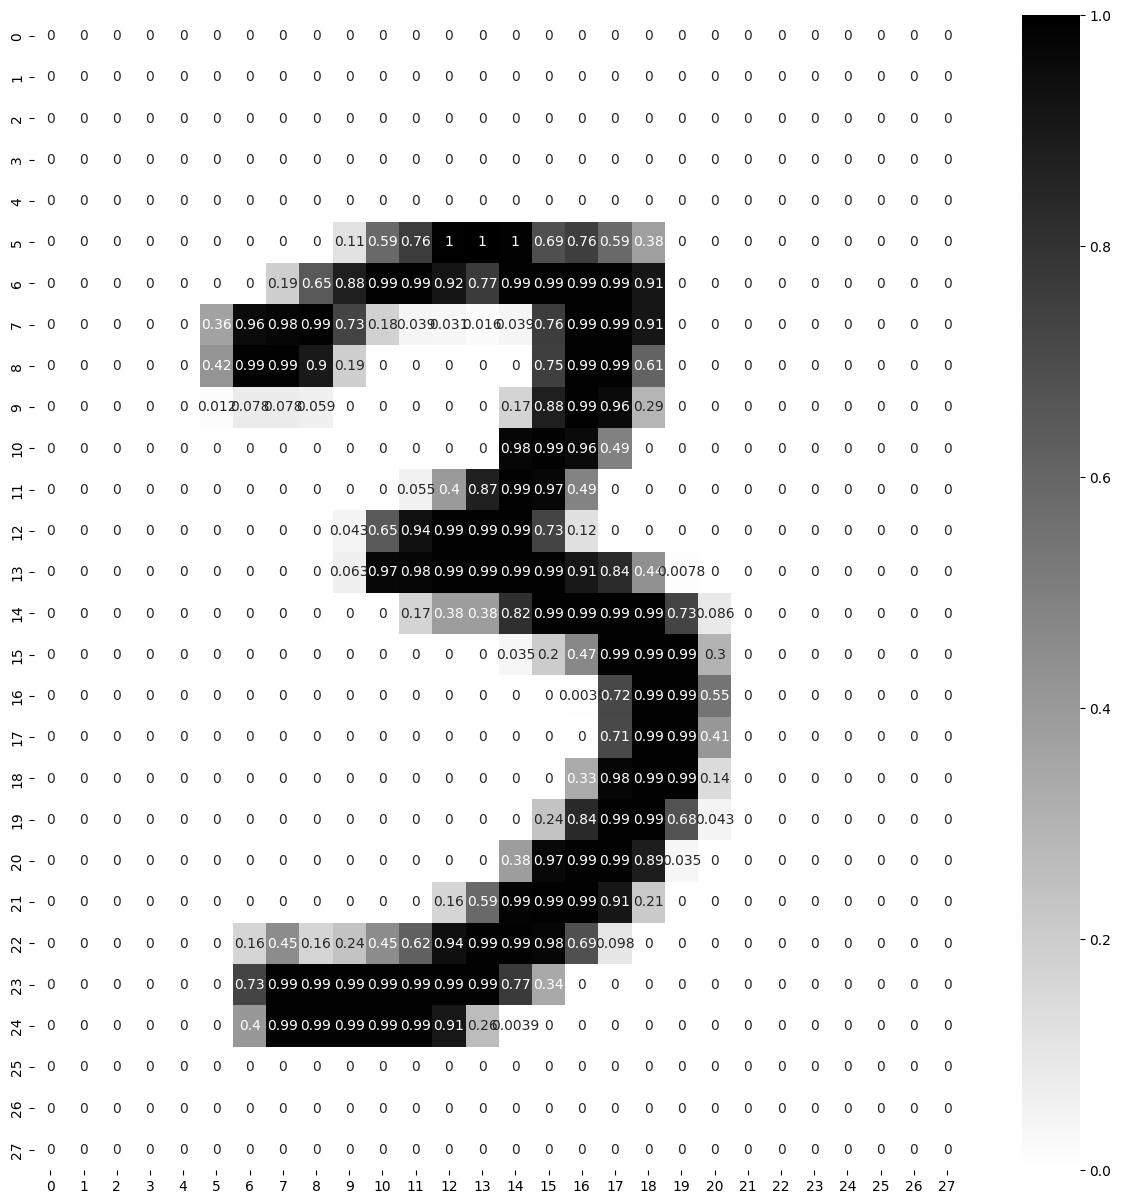

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],cmap='binary',annot=True)

In [62]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]
model_clf=tf.keras.models.Sequential(LAYERS)

In [63]:
model_clf.layers

In [44]:
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
hidden_layer1=model_clf.layers[1]

In [50]:
hidden_layer1.get_weights()

[array([[-0.04150653, -0.06177609,  0.06407422, ...,  0.03807494,
          0.06387149, -0.03795972],
        [ 0.06377716, -0.02804864, -0.02278741, ..., -0.02257387,
          0.02698128, -0.02373813],
        [ 0.05723654,  0.00494624, -0.06191736, ..., -0.05887453,
          0.00152146,  0.02296146],
        ...,
        [ 0.06670302, -0.0324127 ,  0.06915098, ...,  0.01856059,
          0.06311424,  0.04181123],
        [ 0.0158385 ,  0.02489279, -0.0099123 , ..., -0.00624278,
          0.01833418,  0.00680108],
        [-0.02956143, -0.02553736,  0.01004608, ...,  0.03824773,
         -0.0404008 , -0.05580332]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [54]:
hidden_layer1.get_weights()[0].shape
##total (784*300 weights)

(784, 300)

In [55]:
hidden_layer1.get_weights()[1].shape
##total 300 bias

(300,)

In [57]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [65]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [67]:
history = model_clf.fit(x_train,y_train,epochs=30,validation_data=[x_valid,y_valid],batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1041 - accuracy: 0.9700 - val_loss: 0.1208 - val_accuracy: 0.9649
Epoch 2/30
1563/1563 [==============================] - 5s 4ms/step - loss: 0.0963 - accuracy: 0.9730 - val_loss: 0.1166 - val_accuracy: 0.9672
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9747 - val_loss: 0.1159 - val_accuracy: 0.9662
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0830 - accuracy: 0.9765 - val_loss: 0.1078 - val_accuracy: 0.9699
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0772 - accuracy: 0.9783 - val_loss: 0.1047 - val_accuracy: 0.9700
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0716 - accuracy: 0.9804 - val_loss: 0.1049 - val_accuracy: 0.9697
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0672 - accuracy: 0.9815 - val_loss: 0.1007 - val_accuracy:

In [68]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1563}

In [69]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.104105,0.97002,0.120772,0.9649
1,0.096256,0.97304,0.116550,0.9672
2,0.089133,0.97474,0.115878,0.9662
3,0.083018,0.97646,0.107832,0.9699
4,0.077211,0.97832,0.104694,0.9700
5,0.071555,0.98038,0.104907,0.9697
6,0.067198,0.98150,0.100740,0.9707
7,0.063001,0.98288,0.097395,0.9707
8,0.058933,0.98414,0.097685,0.9717
9,0.055448,0.98518,0.092453,0.9729


<Axes: >

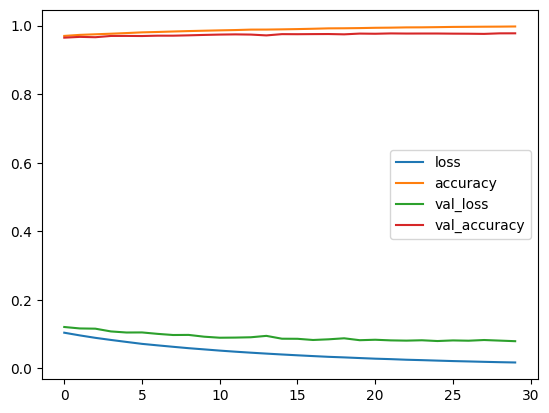

In [70]:
pd.DataFrame(history.history).plot()

In [71]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9785


[0.07157771289348602, 0.9785000085830688]

In [73]:
x_new = x_test[:3]
#new
y_new = y_test[:3]
#actual

<Axes: >

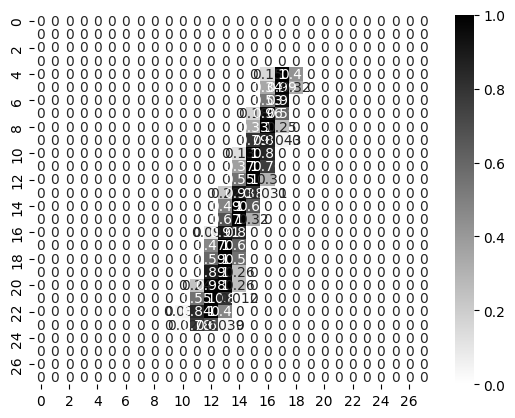

In [82]:
sns.heatmap(x_test[2],annot=True,cmap='binary')

In [81]:
y_prob=model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 17ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [83]:
y_pred = np.argmax(y_prob, axis = -1)

In [84]:
y_pred

array([7, 2, 1])

In [86]:
y_new

array([7, 2, 1], dtype=uint8)

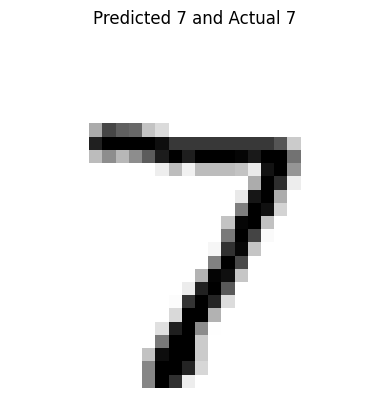

######################


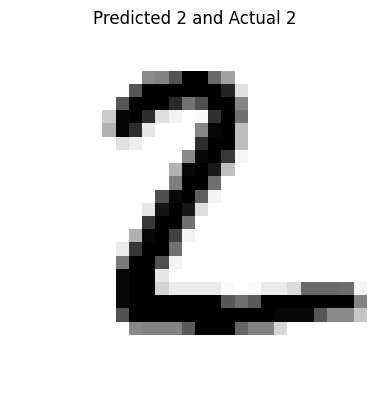

######################


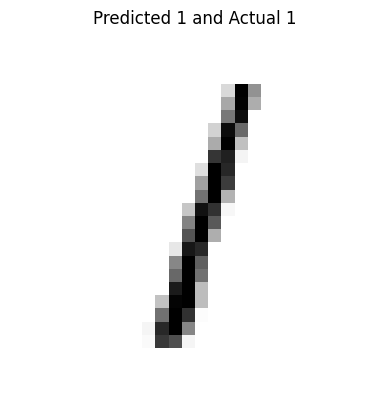

######################


In [88]:
for data, pred, actual_data in zip(x_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")